In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data
data = pd.read_csv('Datasets/mall.csv')

# Select relevant features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

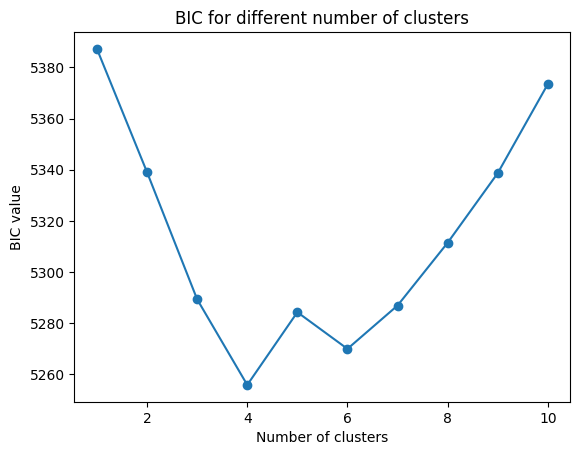

In [3]:
# Calculate BIC for different numbers of clusters
n_components = range(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X) for n in n_components]
bic_values = [m.bic(X) for m in models]

# Plot BIC values
plt.plot(n_components, bic_values, 'o-')
plt.title('BIC for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC value')
plt.show()

In [4]:
# Perform EM clustering with 5 clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
clusters = gmm.fit_predict(X)

# Add cluster labels to the original data
data['Cluster'] = clusters

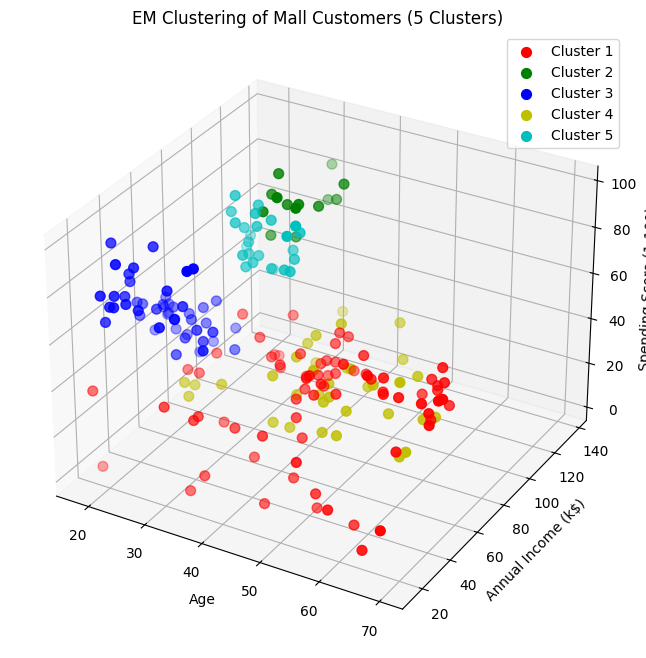

In [5]:
# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c']
for i in range(5):
    cluster_data = data[data['Cluster'] == i]
    ax.scatter(cluster_data['Age'], 
               cluster_data['Annual Income (k$)'], 
               cluster_data['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i+1}', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('EM Clustering of Mall Customers (5 Clusters)')
plt.legend()
plt.show()

In [6]:
cluster_stats = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_stats)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        50.184211           45.842105               40.697368
1        32.571429          103.642857               84.500000
2        24.440000           43.300000               62.780000
3        41.685714           88.228571               17.285714
4        32.760000           76.960000               80.800000


In [7]:
probabilities = gmm.predict_proba(X)
print("Probability of first 5 customers belonging to each cluster:")
print(probabilities[:5])

Probability of first 5 customers belonging to each cluster:
[[9.99852725e-01 1.33741124e-14 1.46958077e-04 3.17012256e-07
  1.45931253e-53]
 [1.30527611e-08 3.26512831e-08 9.99999954e-01 2.03122825e-20
  4.43131723e-44]
 [9.99686465e-01 5.78891555e-29 9.58266430e-15 3.13535003e-04
  2.46983551e-65]
 [1.59213757e-07 8.66913792e-08 9.99999754e-01 1.50875697e-18
  1.61111706e-41]
 [9.99651787e-01 5.48856202e-16 3.46876056e-04 1.33708218e-06
  3.11837244e-41]]
